In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
#%run 2.Data_subset.ipynb 
#TS_data = Fred
#TS_data = TS_data.rename(columns = {'Labor Demand': 'y'})
#input_df2.head()
#TS_data.shape
data = pd.read_pickle('C:\\Users\\z0047cfr\\Project Work\\Factory Demand Model\\Input Data\\df_T.pkl')
data.shape

(55, 396)

                                               feature  spearman
221                                            data_s3 -0.410545
243                     Severance_Amount_millions_Q_s3 -0.373344
272                             Labor_conv_count_M_scl -0.359229
20                                  Labor_conv_count_M -0.359229
164                             Labor_conv_count_M_lag -0.350311
..                                                 ...       ...
156  EU_Avg_Plant_hpw_railroad_roll_stk_mfg_Q_Censu...  0.284263
99                      Severance_Amount_millions_Q_d3  0.299854
101                                 Unemp_M_CA_Fred_d3  0.319965
77                                             data_d3  0.686448
41                                             data_d1  1.000000

[288 rows x 2 columns]


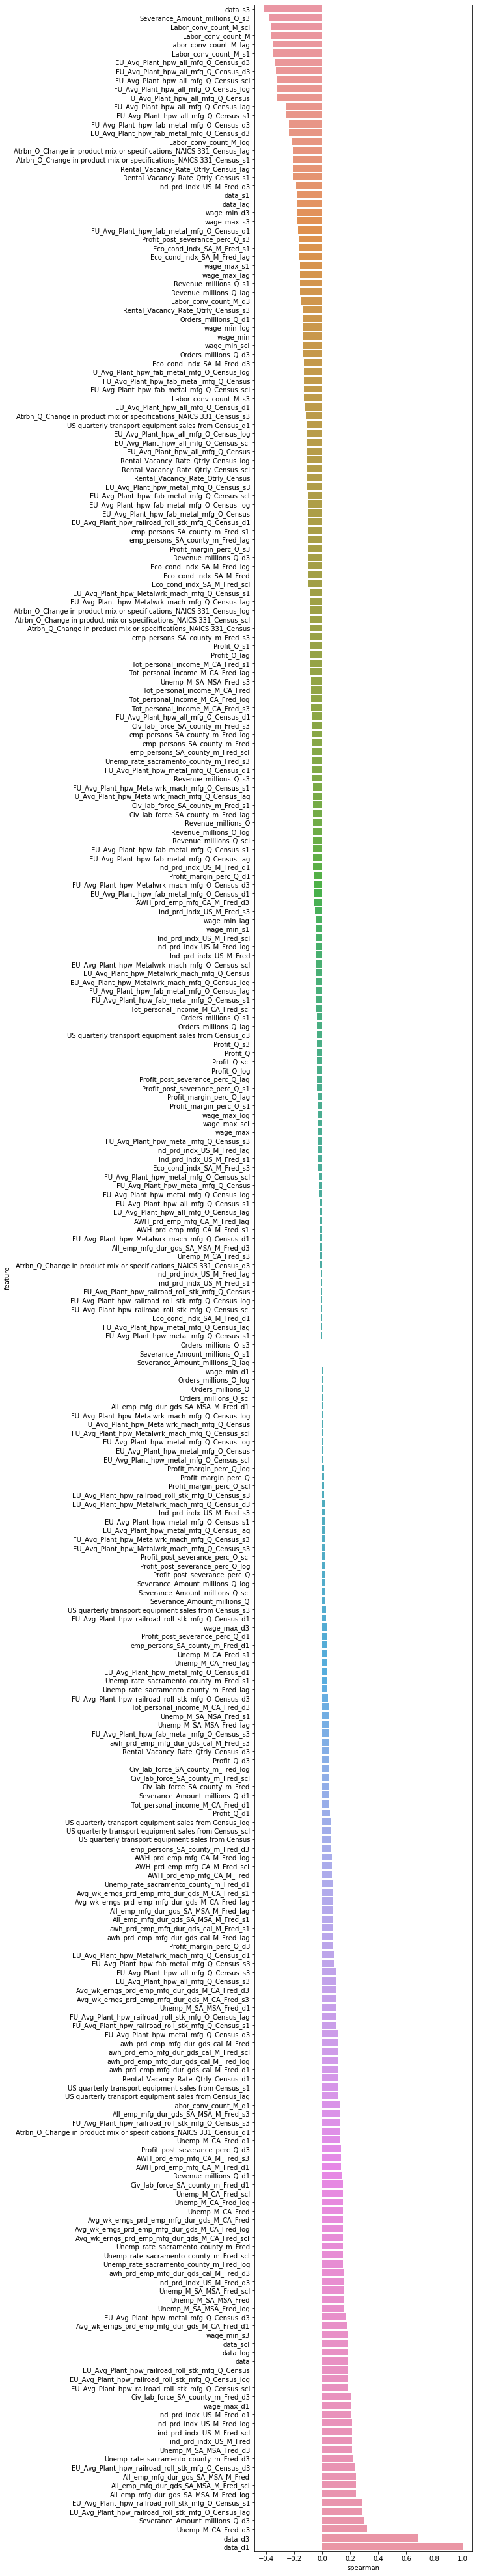

In [2]:
#Spearman correlation is better to work with in this case because it picks up relationships between variables even when they are nonlinear.import seaborn as sns
import matplotlib.pyplot as plt
def spearman(frame, features):
    global spr
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['data_d1'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')
    print(spr)
    
    
quantitative = [f for f in data.columns if data.dtypes[f] != 'object']
features = quantitative
spearman(data, features)

In [3]:
corr_data = spr[(spr['spearman'] <= -0.25) | (spr['spearman'] >= 0.25) ]
corr_data

,feature,spearman
221,data_s3,-0.410545
243,Severance_Amount_millions_Q_s3,-0.373344
272,Labor_conv_count_M_scl,-0.359229
20,Labor_conv_count_M,-0.359229
164,Labor_conv_count_M_lag,-0.350311
200,Labor_conv_count_M_s1,-0.350311
80,EU_Avg_Plant_hpw_all_mfg_Q_Census_d3,-0.335621
85,FU_Avg_Plant_hpw_all_mfg_Q_Census_d3,-0.328433
265,FU_Avg_Plant_hpw_all_mfg_Q_Census_scl,-0.322198
121,FU_Avg_Plant_hpw_all_mfg_Q_Census_log,-0.322198


In [4]:
x = corr_data.feature.to_list()
print(x)

['data_s3', 'Severance_Amount_millions_Q_s3', 'Labor_conv_count_M_scl', 'Labor_conv_count_M', 'Labor_conv_count_M_lag', 'Labor_conv_count_M_s1', 'EU_Avg_Plant_hpw_all_mfg_Q_Census_d3', 'FU_Avg_Plant_hpw_all_mfg_Q_Census_d3', 'FU_Avg_Plant_hpw_all_mfg_Q_Census_scl', 'FU_Avg_Plant_hpw_all_mfg_Q_Census_log', 'FU_Avg_Plant_hpw_all_mfg_Q_Census', 'FU_Avg_Plant_hpw_all_mfg_Q_Census_lag', 'FU_Avg_Plant_hpw_all_mfg_Q_Census_s1', 'EU_Avg_Plant_hpw_railroad_roll_stk_mfg_Q_Census_s1', 'EU_Avg_Plant_hpw_railroad_roll_stk_mfg_Q_Census_lag', 'Severance_Amount_millions_Q_d3', 'Unemp_M_CA_Fred_d3', 'data_d3', 'data_d1']


In [5]:
# remove Dependent variable related transformations and highly inter correlated variables keep other variables

In [6]:
varlist_corr_V2 = x

In [7]:
varlist_corr_V2 = [ 
 'Severance_Amount_millions_Q_s3',
#  'Labor_conv_count_M_scl', # correlated to unscaled var
 'Labor_conv_count_M',
 'Labor_conv_count_M_lag', 
#  'Labor_conv_count_M_s1', # same as lag variable
#  'EU_Avg_Plant_hpw_all_mfg_Q_Census_d3',# strongly correlated to utilization rates
#  'FU_Avg_Plant_hpw_all_mfg_Q_Census_d3',  # strong corr with  s3 but less correlation with welder count
#  'FU_Avg_Plant_hpw_all_mfg_Q_Census_log',
#  'FU_Avg_Plant_hpw_all_mfg_Q_Census_scl',  # correlated to unscaled var
 'FU_Avg_Plant_hpw_all_mfg_Q_Census',
 #'Severance_Amount_millions_Q_d3', 
 'Unemp_M_CA_Fred_d3'
 ]

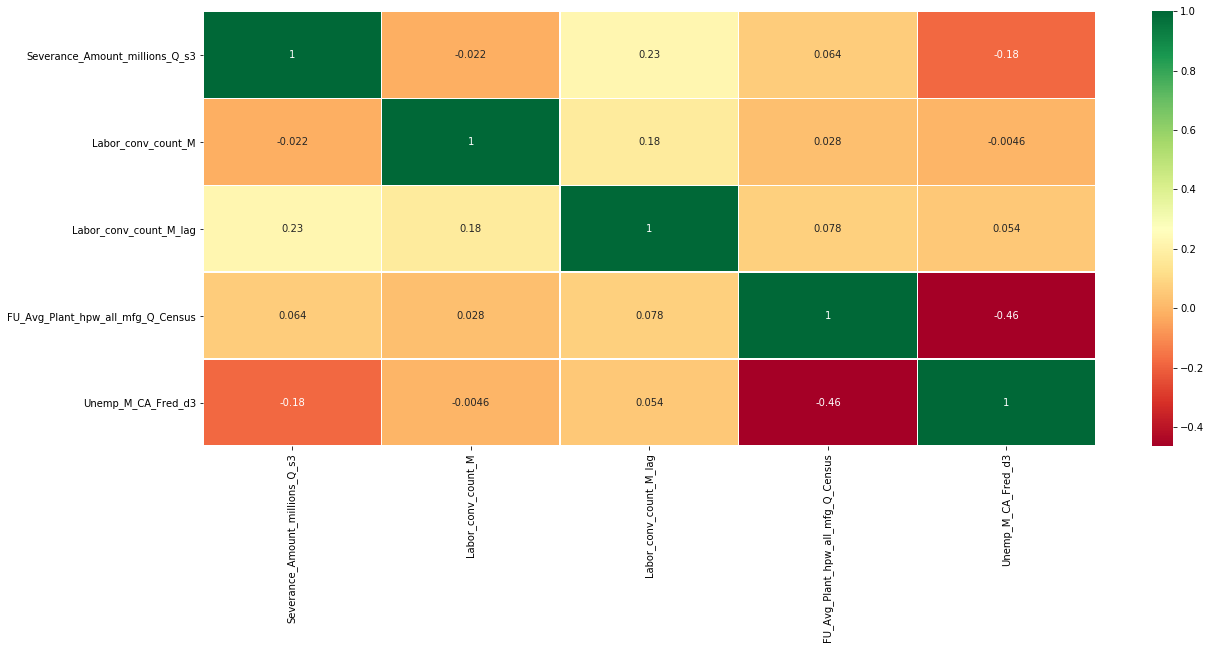

In [8]:
    sns.heatmap(data[varlist_corr_V2].corr('spearman'),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
    fig=plt.gcf()
    fig.set_size_inches(20,8)
    plt.show()
    

[0.09215418 0.2380779  0.18877921 0.17277069 0.30821802]


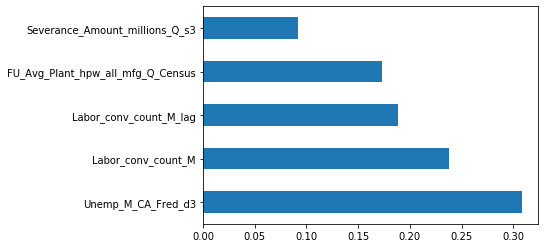

In [9]:
import pandas as pd
import numpy as np
X = data[varlist_corr_V2]  #independent columns
y = data.data_d1
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [10]:
varlist_corr_V3 = [
]
varlist_corr_V3

[]

In [12]:
pip install xverse

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement xverse (from versions: none)
ERROR: No matching distribution found for xverse


In [13]:
from xverse.ensemble import VotingSelector
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'xverse'